This is a test for a line fitter that will be use in a ransac algorithym to track a circle but right we testing the base form as it is a line plotter . source :scikit-image

Michel Akpro
Make sure you get this package:pip install scikit-image


In [1]:
import numpy as np
from matplotlib import pyplot as plt
from skimage.measure import LineModelND, ransac


 Since to create a Ransac algorithym we need to create a randonm number generator .
 To take randomn point on a image in order to determine the hight iliners.

In [4]:
rng = np.random.default_rng()


Generate coordinates of line of 2D cordinate and show how th original representation of data created looks like

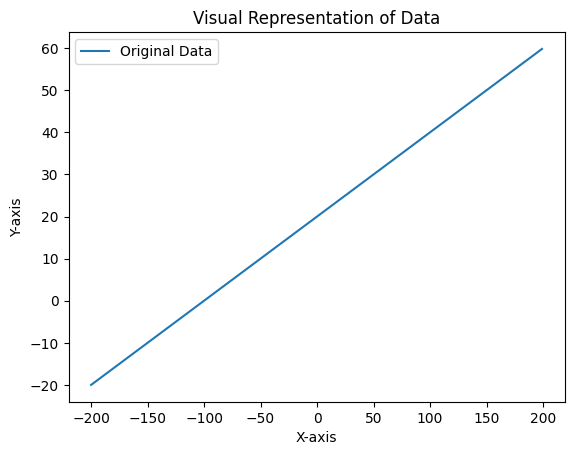

In [7]:

x = np.arange(-200, 200) # define the array of x points on our lines
y = 0.2 * x + 20 #define y v alues for each arrays of x points. since we are using a simple line here we choose something very easy to identify whereas if we had a circle we would probably choose a parabolic function
data = np.column_stack([x, y])# combine our 2 groups of points in an array
plt.plot(data[:, 0], data[:, 1], label='Original Data')
plt.title('Visual Representation of Data')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.show()

Add gaussian noise to coordinates, using the methods use in class i will now add the gaussian noise with representation.

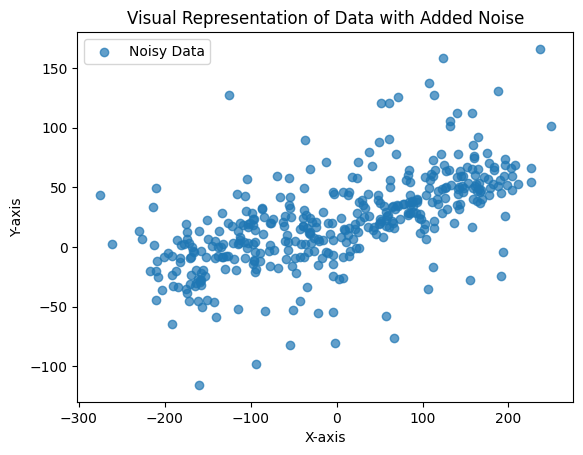

In [9]:
noise = rng.normal(size=data.shape) # as seen in lecture add gaussian noise to identify points on the cartesian plan
data += 10 * noise  # chage the noise multiplier to a higher number give us more noise, since i need to check how good this is im adding a lot of noise
data[::2] += 5 * noise[::2]
data[::4] += 20 * noise[::4]

plt.scatter(data[:, 0], data[:, 1], label='Noisy Data', alpha=0.7)
plt.title('Visual Representation of Data with Added Noise')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.show()

add faulty data , this part of the code introduce adding randomn points to the graph
all over the place , add noise to stimulate fault data in my code since im  not using an image and this is just a demonstration. they can be seen on the graph below

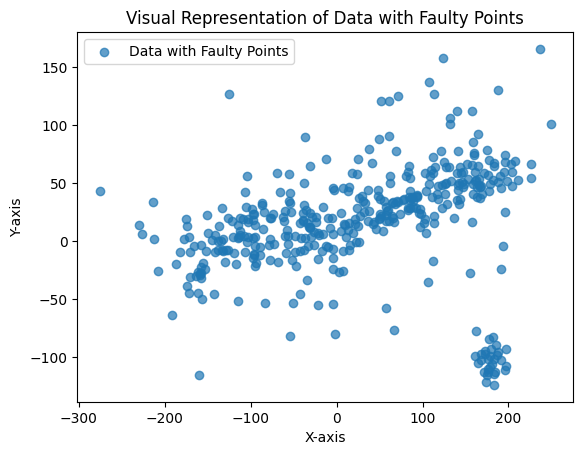

In [15]:
faulty = np.array(10 * [(180., -100)])
faulty += 10 * rng.normal(size=faulty.shape)
data[:faulty.shape[0]] = faulty

plt.scatter(data[:, 0], data[:, 1], label='Data with Faulty Points', alpha=0.7)
plt.title('Visual Representation of Data with Faulty Points')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.show()

fit line using all data, with all our data we start now the ransac algorithim function on open cv . we will show the final result with all the points gather to fits a line on it .

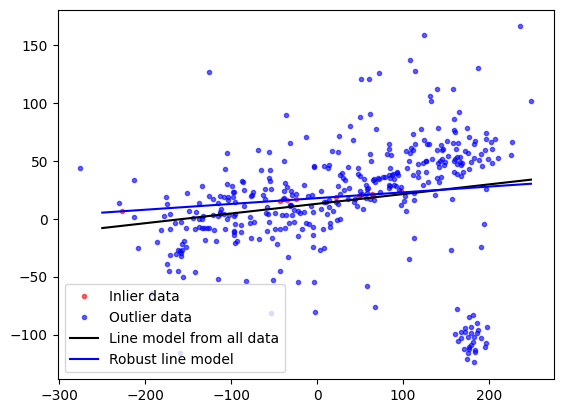

In [16]:
model = LineModelND() # function line  model to estimate the line , initailiaze by model 
model.estimate(data)#used here to get estimation of data
model_robust, inliers = ransac(data, LineModelND, min_samples=30,
                               residual_threshold=1, max_trials=1000)  # here where the data Ransac works to show magic for the line to iterate 2 in order to find the max inlers , in normal examples we would need to find as least 10 samples as the lest the lest processing it takes.
outliers = (inliers == False) #seperate inliers from outliers

# generate coordinates of estimated models
line_x = np.arange(-250, 250)# our estimated model range is higher than the first data points because we need to cover a broader range then the original data 
line_y = model.predict_y(line_x)
line_y_robust = model_robust.predict_y(line_x)


# using the mathplot to plot everything as in a normal image we would plot it inside of it 
fig, ax = plt.subplots()
ax.plot(data[inliers, 0], data[inliers, 1], '.r', alpha=0.6,
        label='Inlier data')
ax.plot(data[outliers, 0], data[outliers, 1], '.b', alpha=0.6,
        label='Outlier data')
ax.plot(line_x, line_y, '-k', label='Line model from all data')
ax.plot(line_x, line_y_robust, '-b', label='Robust line model')
ax.legend(loc='lower left')
plt.show()

We need that our algorithm selected the points he thought were the best estimation after 2 itrations. we can change that number for better results.